In [453]:
import pandas as pd
import numpy as np
from tqdm import tqdm

In [454]:
ofi = pd.read_csv('../data_cleaned/ofi_10_levels.csv')
OFI_values = ofi.drop(['mid_price_delta', 'time_bin', 'bin_label'], axis=1)

In [459]:
len(ofi)

124

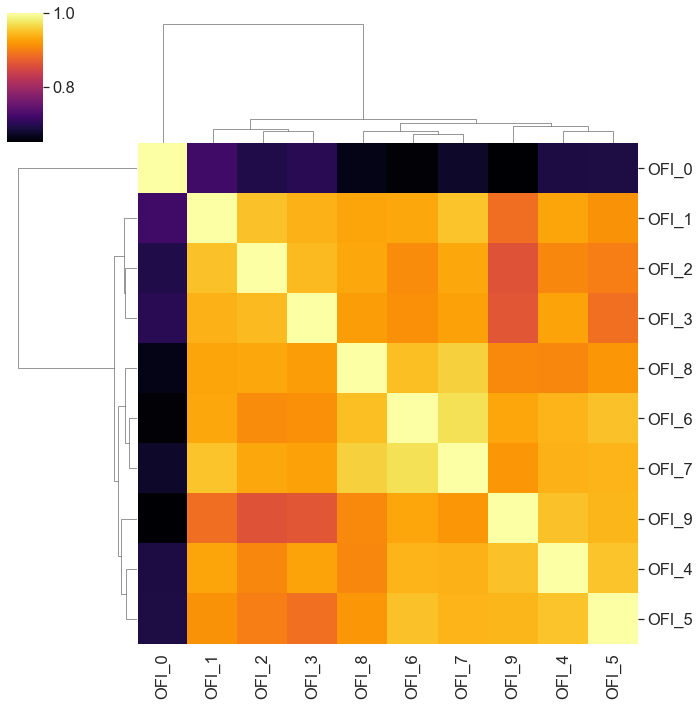

In [455]:
sns.clustermap(OFI_values.corr(), cmap='inferno',  )

<AxesSubplot:xlabel='mid_price_delta', ylabel='Count'>

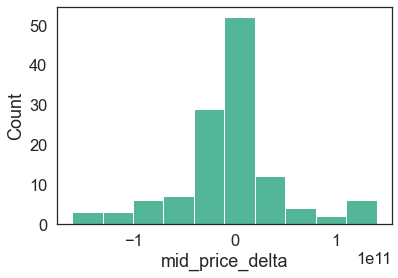

In [456]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(x='mid_price_delta',data=ofi, bins=10)

explained variance ratio: [0.89429368 0.04842077 0.02122749 0.01028081 0.00667304 0.00601991
 0.00517373 0.00334368 0.00260536 0.00196153]


/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


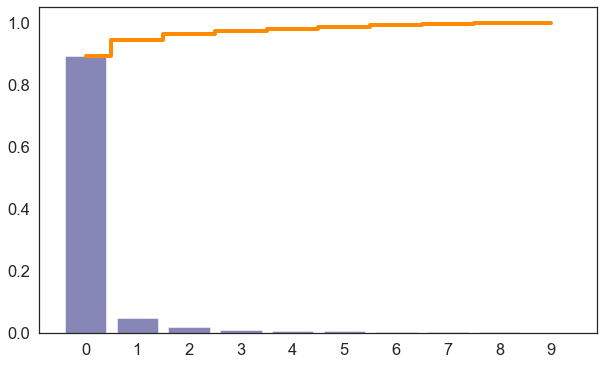

In [457]:
#pca reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(OFI_values) 
pca = PCA(n_components=None)
pca.fit(scaled)
new_ofi = pca.transform(scaled)


fig, ax = plt.subplots(figsize=(10,6))
sns.set_theme(style='white', font_scale=1.5, palette = 'magma')

explained_var = pca.explained_variance_ratio_
print('explained variance ratio: {}'.format(explained_var))
sns.barplot(np.arange(len(explained_var)), explained_var, alpha=0.5, color = 'navy' )

plt.step(np.arange(len(explained_var)), np.cumsum(explained_var), 
            drawstyle='steps-pre', color='darkorange', lw=4, where = 'mid')

<AxesSubplot:xlabel='mid_price_delta', ylabel='OFI_0'>

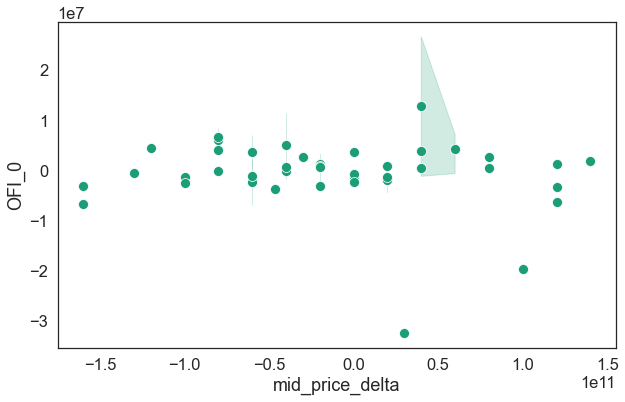

In [458]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='white', palette='Dark2', font_scale=1.5)
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x='mid_price_delta', y='OFI_0', data=ofi, ax=ax, linewidth = 0, markersize=10, marker='o')